<a href="https://colab.research.google.com/github/KhadeejathMubeena/Data_Analysis/blob/main/sales_analysis/Sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

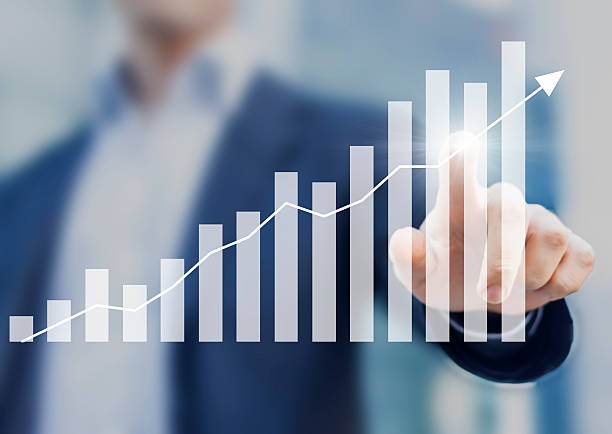

#SALES DATA ANALYSIS

**Consider Sales dataset and analyse it in a proper way.
Expectation: need a clarity on who is spending more money for shopping incase of gender,age_group,state,Occupation,Product_category,marital_status.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://github.com/Taj1920/Data_Analysis/raw/refs/heads/main/sales_data_project/sales_data.csv',encoding='ISO-8859-1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#Removing unwanted columns
df.drop(['unnamed1','Status'],axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
#changing M-->Male and F-->Female
df['Gender']=df['Gender'].map({'F':'Female','M':'Male'})

In [ ]:
#renaming Marital_Status to Marital
df.rename(columns={'Marital_Status':'Marital'},inplace=True)
#changing 0-->Single and 1-->Married
df['Marital']=df['Marital'].map({0:'Single',1:'Married'})
df['Marital'].unique()

array(['Single', 'Married'], dtype=object)

In [ ]:
#Dropping nan val in Amount column
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital           11239 non-null  object 
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.2+ MB


In [ ]:
#resetting the index
df.reset_index(inplace=True)


In [ ]:
df.drop('index',axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


#Data visualization

In [ ]:
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

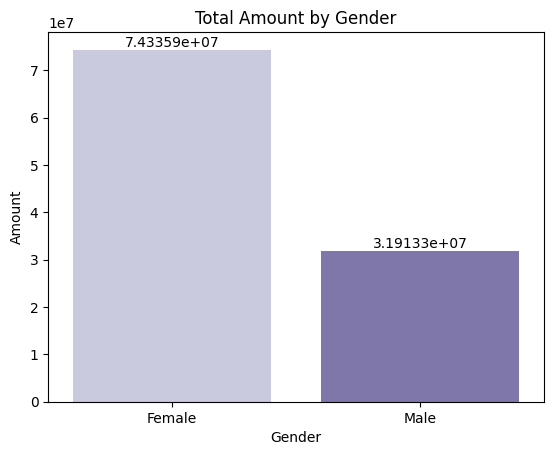

In [ ]:
gender=df.groupby('Gender')['Amount'].sum()
gender=pd.DataFrame(gender)
a=sns.barplot(x='Gender',y='Amount',data=gender,hue='Gender',palette = "Purples")
plt.title('Total Amount by Gender')
data_label(a)

**Female are spending more amount compared to males.**

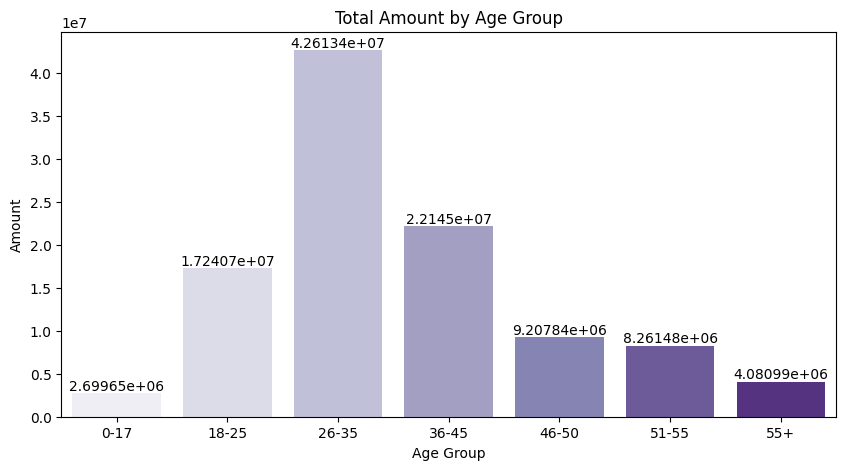

In [ ]:
age=df.groupby('Age Group')['Amount'].sum()
age=pd.DataFrame(age)
plt.figure(figsize=(10,5))
a=sns.barplot(x='Age Group',y='Amount',data=age,hue='Age Group',palette = "Purples")
plt.title('Total Amount by Age Group')
data_label(a)

**Customers who are under 26-35 are spending more amount compared to others.**

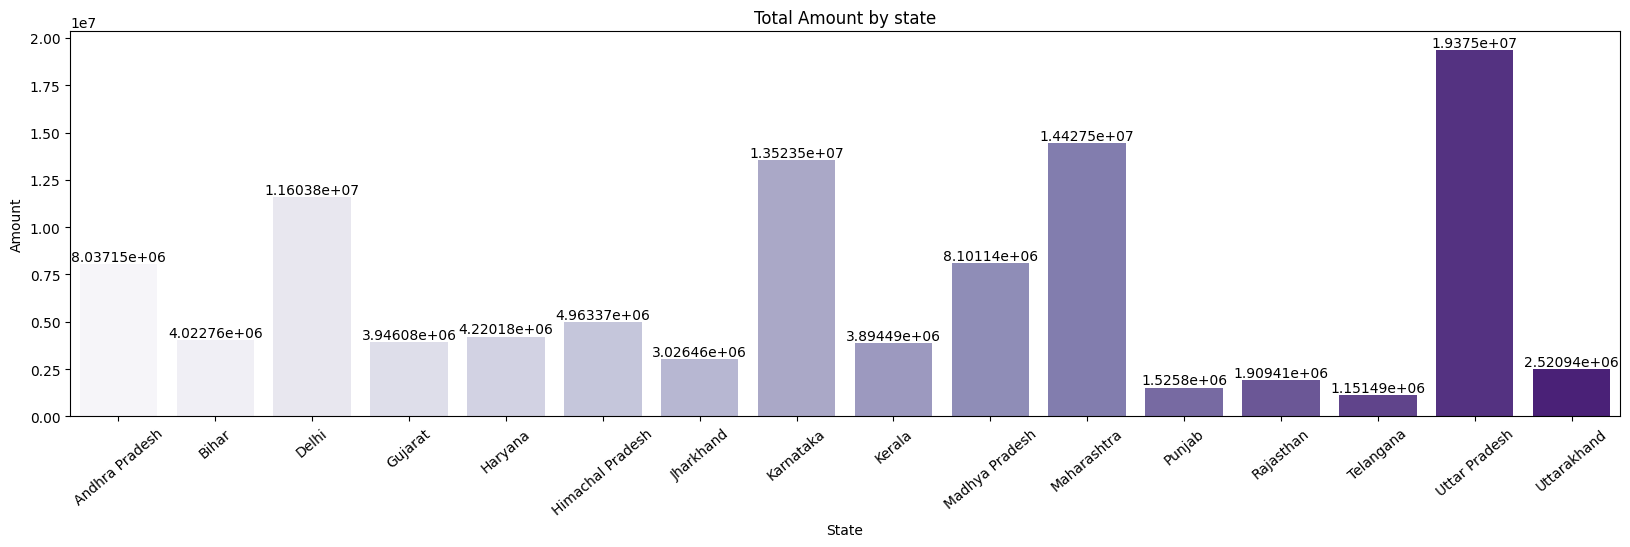

In [ ]:
State=df.groupby('State')['Amount'].sum()
State=pd.DataFrame(State)
plt.figure(figsize=(20,5))
a=sns.barplot(x='State',y='Amount',data=State,hue='State',palette = "Purples")
plt.title('Total Amount by state')
data_label(a)
plt.xticks(rotation = 40)
plt.show()


**Total spend is more in Uttar Pradesh,Maharashtra,Karnataka,Delhi**

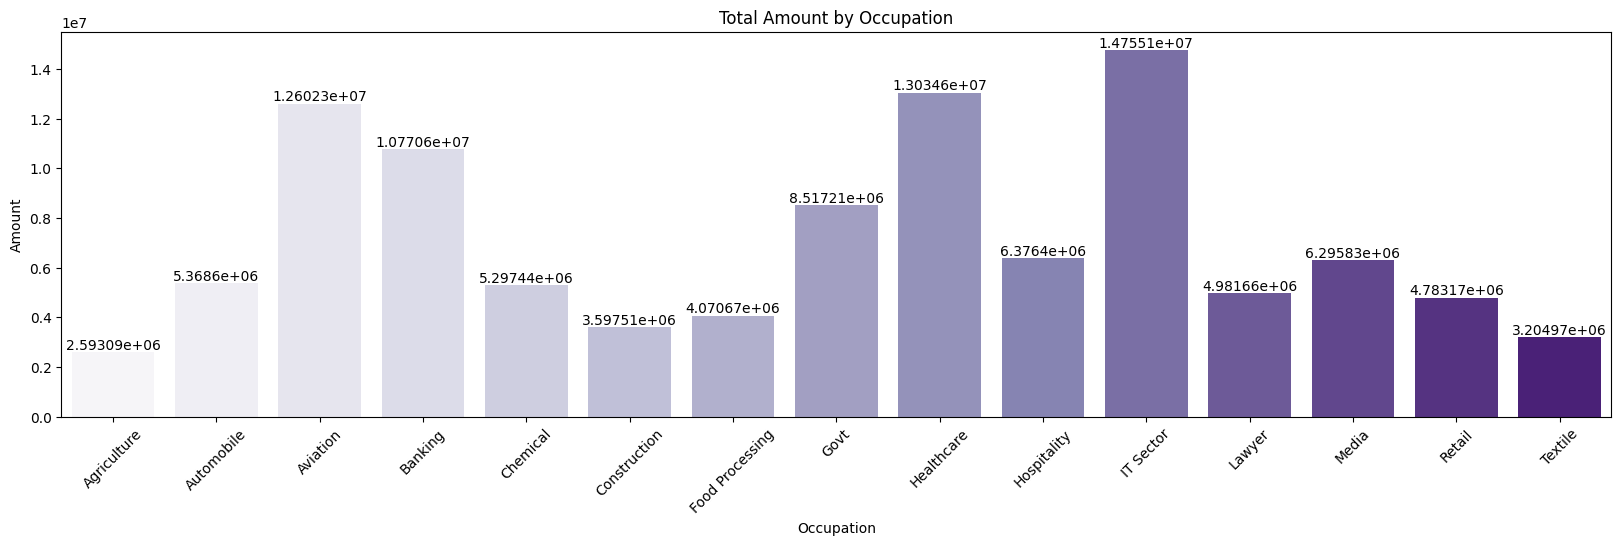

In [ ]:
Occupation=df.groupby('Occupation')['Amount'].sum()
Occupation=pd.DataFrame(Occupation)
plt.figure(figsize=(20,5))
a=sns.barplot(x='Occupation',y='Amount',data=Occupation,hue='Occupation',palette = "Purples")
plt.title('Total Amount by Occupation')
plt.xticks(rotation=45)
data_label(a)

**The total amount spent is higher in the IT sector, Healthcare, Aviation, and Banking compared to other sectors**

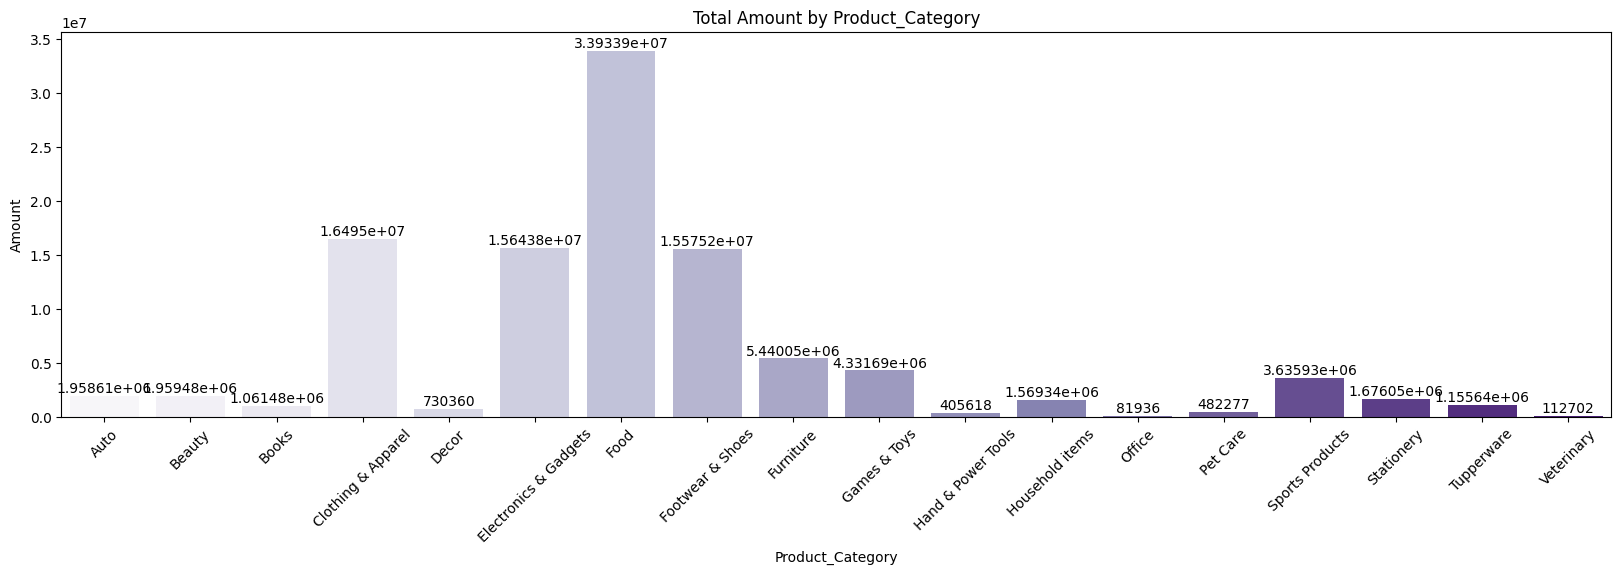

In [ ]:
Product_Category=df.groupby('Product_Category')['Amount'].sum()
Product_Category=pd.DataFrame(Product_Category)
plt.figure(figsize=(20,5))
a=sns.barplot(x='Product_Category',y='Amount',data=Product_Category,hue='Product_Category',palette = "Purples")
plt.title('Total Amount by Product_Category')
plt.xticks(rotation=45)
data_label(a)

**In terms of Product_Category, the Food category has the highest amount spent compared to other categories**

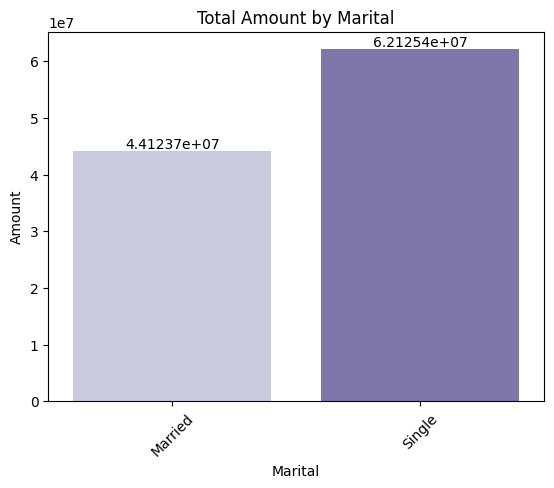

In [ ]:
Marital=df.groupby('Marital')['Amount'].sum()
Marital=pd.DataFrame(Marital)
plt.figure()
a=sns.barplot(x='Marital',y='Amount',data=Marital,hue='Marital',palette = "Purples")
plt.title('Total Amount by Marital')
plt.xticks(rotation=45)
data_label(a)

**The amount spent is higher among singles compared to married people.**

**Conclusion: Based on the above analysis i can conclude that single females of age 26-35 from Uttar-pradesh,maharastra and karnataka working in IT,Healthcare and aviation spending more money on food,electronic gadgets,clothes and footware**